In [4]:
from os import environ, path as osp
environ["REPO_ROOT"] = "/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/ZHH"
environ["MARLIN_ROOT"] = "/root/public/MarlinWorkdirs/ZHH/output"

import uproot as ur
import matplotlib as plt
import numpy as np
import seaborn as sns
import pandas as pd
from glob import glob
from phc import module_reload, reload_phc
reload_phc(); module_reload('zhh')
from tqdm.auto import tqdm

In [2]:
glob('/pnfs/desy.de/ilc/prod/ilc/*')

['/pnfs/desy.de/ilc/prod/ilc/mc-opt-3', '/pnfs/desy.de/ilc/prod/ilc/mc-2020']

In [13]:
a = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [4, 5, 6]
})
a

,a,b
0,1,4
1,2,5
2,3,6


In [17]:
b_dict = {
    'a': [1, 1, 1],
    'b': [1, 1, 1]
}
b = pd.DataFrame(b_dict)
b

ValueError: If using all scalar values, you must pass an index

In [15]:
def df_append(df:pd.DataFrame, d:dict):    
    return pd.concat([df, pd.DataFrame(d)], ignore_index=True)

In [16]:
df_append(a, b_dict)

,a,b
0,1,4
1,2,5
2,3,6
3,1,1
4,1,1
5,1,1


In [3]:
for path in glob('/pnfs/desy.de/ilc/prod/ilc/mc-opt-3/ild/dst-merged/500-TDR_ws/*/*/*/*.slcio'):
    process = path.split('500-TDR_ws/')[1].split('/ILD_l5_o1_v02')[0]
    
    print(f'Marlin scripts/ZHH_v2.xml --constant.OutputBaseName={process} --global.LCIOInputFiles={path} --global.MaxRecordNumber=200')

Marlin scripts/ZHH_v2.xml --constant.OutputBaseName=2f_Z_bhabhag --global.LCIOInputFiles=/pnfs/desy.de/ilc/prod/ilc/mc-opt-3/ild/dst-merged/500-TDR_ws/2f_Z_bhabhag/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250101.P2f_z_bhabhag.eL.pL.n001.d_dstm_10366_0.slcio --global.MaxRecordNumber=200
Marlin scripts/ZHH_v2.xml --constant.OutputBaseName=2f_Z_hadronic --global.LCIOInputFiles=/pnfs/desy.de/ilc/prod/ilc/mc-opt-3/ild/dst-merged/500-TDR_ws/2f_Z_hadronic/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250114.P2f_z_h.eL.pR.n001.d_dstm_10410_0.slcio --global.MaxRecordNumber=200
Marlin scripts/ZHH_v2.xml --constant.OutputBaseName=2f_Z_leptonic --global.LCIOInputFiles=/pnfs/desy.de/ilc/prod/ilc/mc-opt-3/ild/dst-merged/500-TDR_ws/2f_Z_leptonic/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250106.P2f_z_l.eL.pR.n001.d_dstm_10255_0.slcio --global.MaxRecordNumber=200
Marlin scripts/ZHH_v2.xml --constant.OutputBaseN

In [33]:
from typing import Optional
import json

def load_json(path:str)->Optional[dict]:
    try:
        with open(path, 'r') as f:
            return json.load(f)
    except:
        return None
    
def cross_sec(pem, pep, ):

In [34]:
json_files = glob(environ["MARLIN_ROOT"] + '/*.json')
json_files

['/root/public/MarlinWorkdirs/ZHH/output/2f_Z_hadronic_FinalStateMeta.json',
 '/root/public/MarlinWorkdirs/ZHH/output/2f_Z_nuNg_FinalStateMeta.json',
 '/root/public/MarlinWorkdirs/ZHH/output/2f_Z_bhabhag_FinalStateMeta.json',
 '/root/public/MarlinWorkdirs/ZHH/output/zhh_FinalStateMeta.json',
 '/root/public/MarlinWorkdirs/ZHH/output/2f_Z_leptonic_FinalStateMeta.json']

In [35]:
processes = ['2f_Z_leptonic', '2f_Z_hadronic', '2f_Z_nuNg', '2f_Z_bhabhag']
presels = ['llHH', 'qqHH', 'vvHH']

In [36]:
# Collect the number of events and polarization-weighted cross section for every file
a = load_json(json_files[3])
a

{'crossSection': 2961.97998046875,
 'eventWeight': 1.0,
 'nEvtSum': 99,
 'polElectron': -1.0,
 'polPositron': -1.0,
 'run': 250101}

In [37]:
def weighting(cross_sec, l_tot, event_pol, N_gen):
    return cross_sec * l_tot * event_pol / N_gen

In [19]:
for process in processes:
    print(f'Process: {process}')
    for presel in presels:
        with ur.open(f'{environ["REPO_ROOT"]}/output/{process}_PreSelection_{presel}.root') as rf:
            passed = rf['eventTree']['preselPassed'].array()
            
            n_items = len(passed)
            n_passed = np.sum(passed)
            
            print(f'(ntot={n_items}) | {presel}: {n_passed} passed ' + (f'({n_passed/n_items*100:.4f}%)' if n_passed > 0 else ''))
    print('')

Process: 2f_Z_leptonic
(ntot=32400) | llHH: 15 passed (0.0463%)
(ntot=32400) | qqHH: 0 passed 
(ntot=32400) | vvHH: 0 passed 

Process: 2f_Z_hadronic
(ntot=10200) | llHH: 2 passed (0.0196%)
(ntot=10200) | qqHH: 0 passed 
(ntot=10200) | vvHH: 5 passed (0.0490%)

Process: 2f_Z_nuNg
(ntot=37000) | llHH: 0 passed 
(ntot=37000) | qqHH: 0 passed 
(ntot=37000) | vvHH: 0 passed 

Process: 2f_Z_bhabhag
(ntot=18800) | llHH: 79 passed (0.4202%)
(ntot=18800) | qqHH: 0 passed 
(ntot=18800) | vvHH: 0 passed 



After

In [22]:
processes = ['2f_Z_leptonic', '2f_Z_hadronic', '2f_Z_nuNg', '2f_Z_bhabhag']
presels = ['llHH', 'qqHH', 'vvHH']

for process in processes:
    print(f'Process: {process}')
    for presel in presels:
        with ur.open(f'{environ["REPO_ROOT"]}/output/{process}_PreSelection_{presel}.root') as rf:
            passed = rf['eventTree']['preselPassed'].array()
            
            n_items = len(passed)
            n_passed = np.sum(passed)
            
            print(f'(ntot={n_items}) | {presel}: {n_passed} passed ' + (f'({n_passed/n_items*100:.4f}%)' if n_passed > 0 else ''))
    print('')

Process: 2f_Z_leptonic
(ntot=32400) | llHH: 0 passed 
(ntot=32400) | qqHH: 0 passed 
(ntot=32400) | vvHH: 1 passed (0.0031%)

Process: 2f_Z_hadronic
(ntot=10200) | llHH: 2 passed (0.0196%)
(ntot=10200) | qqHH: 0 passed 
(ntot=10200) | vvHH: 5 passed (0.0490%)

Process: 2f_Z_nuNg
(ntot=37000) | llHH: 0 passed 
(ntot=37000) | qqHH: 0 passed 
(ntot=37000) | vvHH: 0 passed 

Process: 2f_Z_bhabhag
(ntot=18800) | llHH: 0 passed 
(ntot=18800) | qqHH: 0 passed 
(ntot=18800) | vvHH: 0 passed 



In [20]:
a = np.empty(10, dtype=[('status', 'i'), ('path', 'U255') ] )
a

array([(0, ''), (0, ''), (0, ''), (0, ''), (0, ''), (0, ''), (0, ''),
       (0, ''), (0, ''), (0, '')],
      dtype=[('status', '<i4'), ('path', '<U255')])

In [21]:
a[0]['path'] = 'asd'
a

array([(0, 'asd'), (0, ''), (0, ''), (0, ''), (0, ''), (0, ''), (0, ''),
       (0, ''), (0, ''), (0, '')],
      dtype=[('status', '<i4'), ('path', '<U255')])

In [22]:
a

array([(0, 'asd'), (0, ''), (0, ''), (0, ''), (0, ''), (0, ''), (0, ''),
       (0, ''), (0, ''), (0, '')],
      dtype=[('status', '<i4'), ('path', '<U255')])

In [69]:
#files = glob(f'{environ["REPO_ROOT"]}/output/*/zhh_PreSelection.root')
files = glob(f'/root/nfs/zhh_PreSelection/zhh_PreSelection.root')
files

['/root/nfs/zhh_PreSelection/zhh_PreSelection.root']

In [70]:
output_dir = f'{environ["REPO_ROOT"]}/output'

n_bins = 13
bin_counts = { k: 0 for k in range(n_bins) }

if False:
    preselection_consec = []
    for f in tqdm(files):
        d = ur.open(files[0])['eventTree']
        preselection_consec = preselection_consec + list(d['preselsPassedConsec'].array())
        
    preselection_consec = np.array(preselection_consec)

vecs = []
for f in tqdm(files):
    d = ur.open(f)['eventTree']
    vecs.append(np.array(d['preselsPassedVec'].array()))
    
vecs = np.concatenate(vecs)

  0%|          | 0/1 [00:00<?, ?it/s]

ValueError: cannot convert to RegularArray because subarray lengths are not regular (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-33/awkward-cpp/src/cpu-kernels/awkward_ListOffsetArray_toRegularArray.cpp#L22)

In [74]:
arr = d['preselsPassedVec'].array()

In [79]:
lengths = []
for i in range(len(arr)):
    lengths.append(len(arr[i]))

In [82]:
min(lengths), max(lengths)

(8, 12)

/root/public/MarlinWorkdirs/ZHH/zhh/plots/plot_preselection_pass.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  return ax.get_figure()


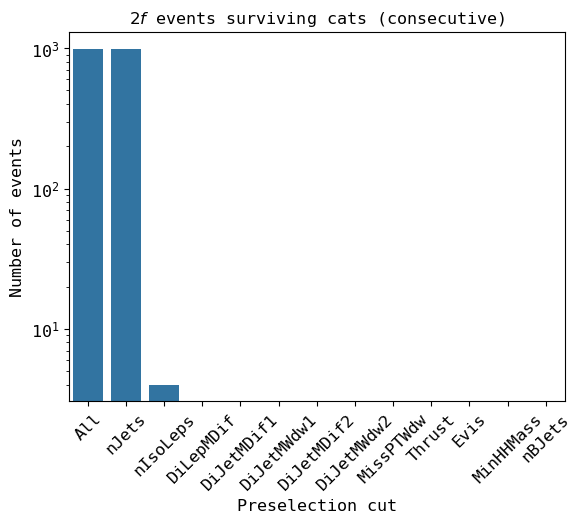

/root/public/MarlinWorkdirs/ZHH/zhh/plots/plot_preselection_pass.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


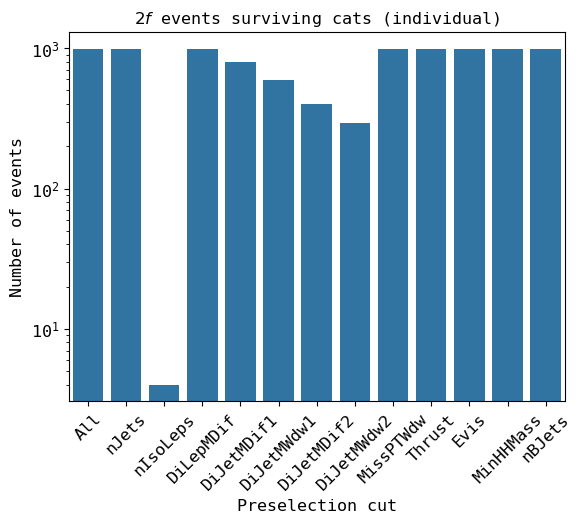

In [66]:
from zhh import plot_preselection_pass
from phc import export_figures

figs = plot_preselection_pass(vecs)
export_figures(f'{output_dir}/plots.pdf', figs)

In [27]:
col = df['process']
col.array()

<Array ['z_h0', 'z_h0', 'z_h0', ..., 'z_h0', 'z_h0'] type='497 * string'>

<Axes: ylabel='Count'>

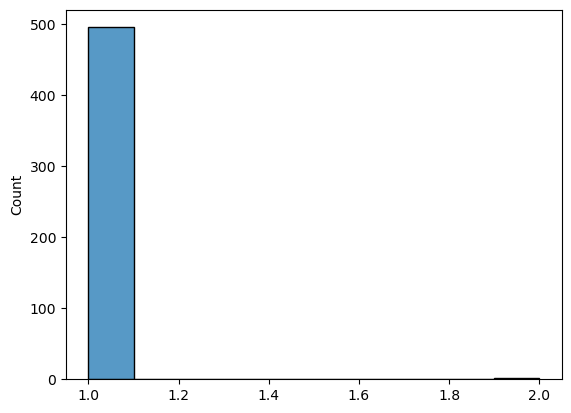

In [31]:
sns.histplot(consec)

In [25]:
vecs = np.array(df['preselsPassedvecs'].array())

bars = list(range(len(vecs.T) + 1))
vals = [len(vecs)]

temp = np.ones(len(vecs), dtype=int)

for i in range(len(vecs.T)):
    temp = temp & vecs.T[i]
    vals.append(np.sum(temp))
    
    if i == len(vecs.T) - 1:
        mask_final = temp == 1
    
del temp

print(f"Events which passed: {df['event'].array()[mask_final]}")

Events which passed: []
bars


In [26]:
print(bars, vals)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] [497, 497, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


/tmp/ipykernel_2199029/3617261500.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(desc, rotation=45)


[Text(0, 0, 'All'),
 Text(1, 0, 'nJets'),
 Text(2, 0, 'nIsoLeps'),
 Text(3, 0, 'DiLepMDif'),
 Text(4, 0, 'DiJetMDif1'),
 Text(5, 0, 'DiJetMWdw1'),
 Text(6, 0, 'DiJetMDif2'),
 Text(7, 0, 'DiJetMWdw2'),
 Text(8, 0, 'MissPTWdw'),
 Text(9, 0, 'Thrust'),
 Text(10, 0, 'Evis'),
 Text(11, 0, 'MinHHMass'),
 Text(12, 0, 'nBJets')]

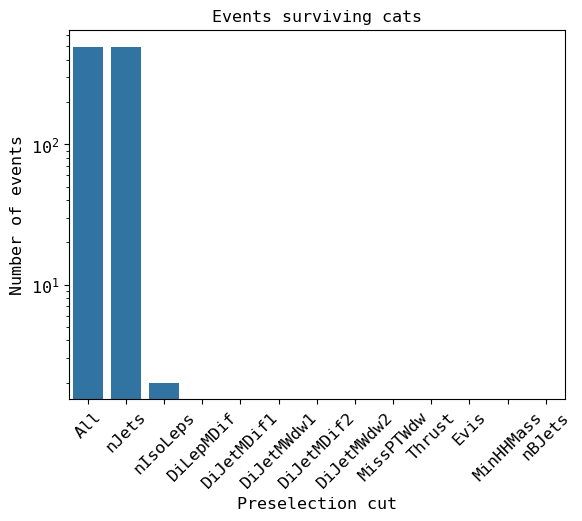

In [27]:
ax = sns.barplot(x=bars, y=vals, )
ax.set_yscale('log')
ax.set_ylabel('Number of events')
ax.set_xlabel('Preselection cut')
ax.set_title('Events surviving cats')

desc = [
    'All',
    'nJets',
    'nIsoLeps',
    'DiLepMDif',
    
    'DiJetMDif1',
    'DiJetMWdw1',
    'DiJetMDif2',
    'DiJetMWdw2',
    
    'MissPTWdw',
    'Thrust',
    'Evis',
    'MinHHMass',
    'nBJets',
]
ax.set_xticklabels(desc, rotation=45)

In [49]:
from glob import glob

def get_files() -> dict[int, str]:
    arr = glob("/pnfs/desy.de/ilc/prod/ilc/mc-2020/ild/dst-merged/500-TDR_ws/2f_Z_hadronic/ILD_l5_o1_v02/v02-02-03/*/*/*.slcio")
    arr.sort()
    
    res = { k: v for k, v in zip(list(range(len(arr))), arr) }
    
    return res

get_files()

{0: '/pnfs/desy.de/ilc/prod/ilc/mc-2020/ild/dst-merged/500-TDR_ws/2f_Z_hadronic/ILD_l5_o1_v02/v02-02-03/00015902/000/rv02-02-03.sv02-02-03.mILD_l5_o1_v02.E500-TDR_ws.I500259.P2f_z_h.eL.pR.n000.d_dstm_15902_0.slcio',
 1: '/pnfs/desy.de/ilc/prod/ilc/mc-2020/ild/dst-merged/500-TDR_ws/2f_Z_hadronic/ILD_l5_o1_v02/v02-02-03/00015902/000/rv02-02-03.sv02-02-03.mILD_l5_o1_v02.E500-TDR_ws.I500259.P2f_z_h.eL.pR.n000.d_dstm_15902_1.slcio'}